Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Flávio Lúcio Corrêa Júnior"
COLLABORATORS = ""

---

# Exercício Prático 3: PCA

Neste exercício vamos estudar as representações de baixa dimensão obtidas pelo PCA. O objetivo é reproduzir os resultados obtidos usando o módulo sklearn.decomposition.PCA usando apenas o numpy. Para isto, vamos utilizar os dados contidos em ```p1.txt```.

O conjunto de dados ```p1.txt``` contém recordes nacionais femininos em corridas de 100m, 200m e 400m rasos em segundos e corridas de longa distância em minutos. Os nomes das variáveis não estão incluídos.

In [2]:
# lendo os dados
import pandas as pd
import numpy as np
np.set_printoptions(precision=3)

df = pd.read_csv('p1.txt',sep='\t',header=None,names=["Country","100m","200m","400m","800m","1500m","3000m","Marathon"])
df

,Country,100m,200m,400m,800m,1500m,3000m,Marathon
0,ARG,10.83,22.67,50.56,2.00,4.09,8.96,153.40
1,AUS,11.12,22.23,48.63,1.98,4.02,8.63,143.51
2,AUT,11.15,22.70,50.62,1.94,4.05,8.78,154.35
3,BEL,11.14,22.48,51.45,1.97,4.08,8.82,143.05
4,BER,11.46,23.05,53.30,2.07,4.29,9.81,174.18
5,BRA,11.17,22.60,50.62,1.97,4.17,9.04,147.41
6,CAN,10.98,22.62,49.91,1.97,4.00,8.54,148.36
7,CHI,11.65,23.84,53.68,2.00,4.22,9.26,152.23
8,CHN,10.79,22.01,49.81,1.93,3.84,8.10,139.39
9,COL,11.31,22.92,49.64,2.04,4.34,9.37,155.19


In [3]:
# extraindo a matriz de dados e os nomes dos países
X = df.drop('Country',axis=1).as_matrix()
countries = list(df['Country'])

/home/poggiali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


## Questão resolvida

Para cada variável (coluna), calcule a média usando ```np.mean``` e a variância usando ```np.var```. Use a função ```np.round``` para arredondar o resultado para 3 casas decimais.

In [4]:
# calculando a média mu e a variância sigma2 (o ddof=1 é usado para que o denominador seja m-1)

mu = np.mean(X,axis=0)
sigma2 = np.var(X,axis=0,ddof=1)

print(mu)
print(sigma2)

[ 11.358  23.119  51.987   2.022   4.189   9.081 153.59 ]
[1.553e-01 8.631e-01 6.761e+00 7.547e-03 9.871e-02 6.648e-01 2.710e+02]


## Questão resolvida

Transforme a matriz ```X``` em ```X_centered``` subtraindo a média de cada variável.

In [5]:
# neste caso, a subtração entre matriz e vetor faz com que o vetor seja subtraído de cada linha da matriz

m,n = X.shape
#Mu = mu.repeat(m).reshape((n,m)).T
X_centered = X-mu
X_centered[:5,:]

array([[ -0.528,  -0.449,  -1.427,  -0.022,  -0.099,  -0.121,  -0.19 ],
       [ -0.238,  -0.889,  -3.357,  -0.042,  -0.169,  -0.451, -10.08 ],
       [ -0.208,  -0.419,  -1.367,  -0.082,  -0.139,  -0.301,   0.76 ],
       [ -0.218,  -0.639,  -0.537,  -0.052,  -0.109,  -0.261, -10.54 ],
       [  0.102,  -0.069,   1.313,   0.048,   0.101,   0.729,  20.59 ]])

## Questão resolvida

Agora normalize a matriz ```X_centered``` dividindo cada entrada pelo seu desvio padrão. Salve o resultado em ```X_normalized```.

In [6]:
# neste caso, a divisão entre matriz e vetor faz com que cada linha da matriz seja dividida elemento-a-elemento pelo vetor

sigma = np.sqrt(sigma2)
#Sigma = sigma.repeat(m).reshape((n,m)).T
X_normalized = X_centered/np.sqrt(sigma2)
X_normalized[:5,:]

array([[-1.339, -0.483, -0.549, -0.258, -0.317, -0.148, -0.012],
       [-0.603, -0.956, -1.291, -0.488, -0.539, -0.553, -0.612],
       [-0.527, -0.45 , -0.526, -0.949, -0.444, -0.369,  0.046],
       [-0.553, -0.687, -0.206, -0.603, -0.348, -0.32 , -0.64 ],
       [ 0.259, -0.074,  0.505,  0.548,  0.32 ,  0.894,  1.251]])

## Questão 1

Defina uma matriz que receba como entrada uma matriz $\mathbf{A}_{m \times n}$ de $m$ observações por $n$ variáveis que já foi centralizada e normalizada e retorne a matriz de covariância das variáveis. A função **não pode** utilizar a função ```numpy.cov```, mas sim utilizar a fórmula vista em sala ($m-1$ como denominador).

In [7]:
def calculaCov(A):
    cov = A.T.dot(A) / (m-1)
    return cov

Certifique-se de que o resultado para a matriz ```X_normalized``` é igual aquele encontrado no arquivo ```cov.npz```.

In [8]:
cov = calculaCov(X_normalized)
with open('cov.npz','rb') as f: 
    saida = np.load(f)

assert np.allclose(cov,saida)

## Questão 2

Vamos construir a matriz $P = E^\top$ contendo as duas componentes principais. 
Para isso, você deve obter os dois autovetores dos maiores autovalores em módulo da matriz ```cov``` usando ```np.linalg.eig```.

O resultado obtido usando PCA é mostrado a seguir. É possível que alguns autovetores/componentes tenham sinais opostos.

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_r = pca.fit(X_normalized).transform(X_normalized)
pca.components_

array([[ 0.383,  0.388,  0.373,  0.398,  0.364,  0.384,  0.354],
       [-0.381, -0.393, -0.465,  0.12 ,  0.438,  0.47 ,  0.239]])

In [10]:
def calculaMatrizP(cov, n_componentes):
    eigen_vals, eigen_vecs = np.linalg.eig(cov)
    
    idx = eigen_vals.argsort()[::-1]

    P = []
    for i in range(n_componentes):
        P.append(eigen_vecs.T[idx[i]])
    return np.array(P)

In [11]:
P = calculaMatrizP(cov, 2)
print(P)

assert (
    np.allclose(P[0],pca.components_[0]) or np.allclose(P[0],-pca.components_[0])
) and (
    np.allclose(P[1],pca.components_[1]) or np.allclose(P[1],-pca.components_[1])
)

[[ 0.383  0.388  0.373  0.398  0.364  0.384  0.354]
 [-0.381 -0.393 -0.465  0.12   0.438  0.47   0.239]]


## Questão 3

Calcule a porcentagem da variância total explicada pelo primeiro e segundo componentes principais. Para isto é preciso normalizar os autovalores obtidos no passo anterior pela soma de todos os $n$ autovalores.

O resultado obtido usando PCA é mostrado a seguir.

In [12]:
pca.explained_variance_ratio_

array([0.809, 0.092])

In [13]:
def calculaVarianciaExplicada(cov, n_componentes):
    eigen_vals, eigen_vecs = np.linalg.eig(cov)
    var_explicada = []
    for i in range(n_componentes):
        var_explicada.append(eigen_vals[i]/eigen_vals.sum())
    return np.array(var_explicada)

In [14]:
var_explicada = calculaVarianciaExplicada(cov, 2)
assert np.allclose(var_explicada,pca.explained_variance_ratio_)

## Questão 4

As linhas de ```P``` formam uma base ortogonal. A projeção das linhas de ```X_normalized``` nas linhas de ```P``` geram uma representação para cada país no plano (PC1, PC2). Construa um diagrama de dispersão 2D das 54 observações no plano (PC1, PC2).

O resultado obtido usando PCA é mostrado a seguir.

In [15]:
from matplotlib import pyplot as plt

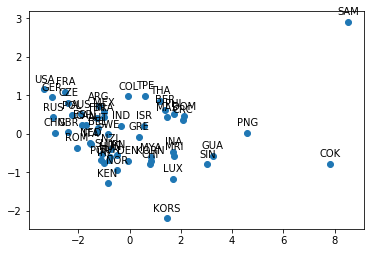

In [16]:
X_r = pca.fit(X_normalized).transform(X_normalized)
plt.scatter(X_r[:,0],X_r[:,1])
for i in range(X_r.shape[0]):
    plt.annotate(countries[i],xy=(X_r[i,0],X_r[i,1]),xytext=(0,5),
                 textcoords='offset points', ha='center', va='bottom')

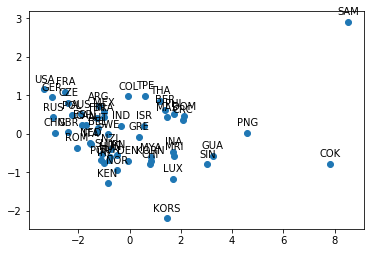

In [26]:
def plotaDiagramaDispersao(P, X_normalized):
    Y = X_normalized.dot(P.T)
    plt.scatter(Y[:,0],Y[:,1])
    for i in range(Y.shape[0]):
        plt.annotate(countries[i],xy=(Y[i,0],Y[i,1]),xytext=(0,5),
                 textcoords='offset points', ha='center', va='bottom')
    
plotaDiagramaDispersao(P, X_normalized)

## Questão 5

Considerando o gráfico anterior, que país poderia ser considerado um outlier? O nome do país pode ser consultado [aqui](https://countrycode.org/).

American Samoa